In [2]:
pip install geopandas --quiet

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install git+https://github.com/martinfleis/geopandas-view.git --quiet

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import geopandas as gpd
from geopandas_view import view
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
malaria_deaths = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2018/2018-11-13/malaria_deaths.csv')

In [6]:
malaria_deaths_year_country = malaria_deaths.groupby(["Year","Entity","Code"]).mean()

In [7]:
malaria_deaths_year_country["Quantiles"] = pd.qcut(
    malaria_deaths_year_country['Deaths - Malaria - Sex: Both - Age: Age-standardized (Rate) (per 100,000 people)'],
    q=4, 
    duplicates='drop',
    labels=False)
malaria_deaths_year_country.reset_index(inplace=True)
malaria_deaths_year_country.Quantiles.value_counts()

0    2646
2    1323
1    1323
Name: Quantiles, dtype: int64

In [8]:
malaria_deaths_year_country

,Year,Entity,Code,"Deaths - Malaria - Sex: Both - Age: Age-standardized (Rate) (per 100,000 people)",Quantiles
0,1990,Afghanistan,AFG,6.802930,2
1,1990,Albania,ALB,0.000000,0
2,1990,Algeria,DZA,0.027130,1
3,1990,American Samoa,ASM,0.325525,1
4,1990,Andorra,AND,0.000000,0
...,...,...,...,...,...
5287,2016,Vietnam,VNM,1.231405,1
5288,2016,World,OWID_WRL,10.203551,2
5289,2016,Yemen,YEM,0.032792,1
5290,2016,Zambia,ZMB,29.473210,2


In [9]:
[a for a in enumerate(set(malaria_deaths_year_country.Quantiles))]

[(0, 0), (1, 1), (2, 2)]

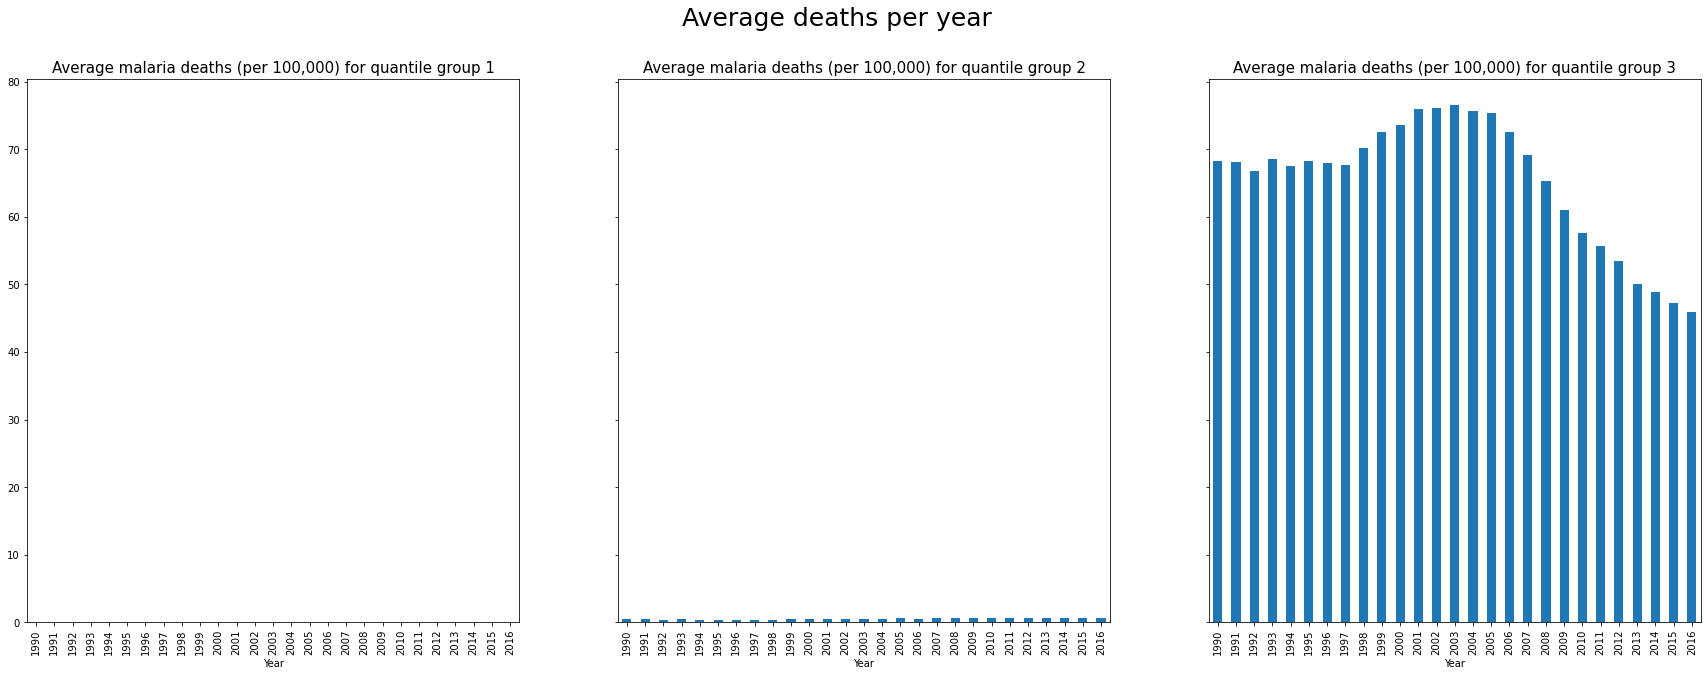

In [10]:
fig, ax = plt.subplots(nrows = 1,
                       ncols = len(set(malaria_deaths_year_country.Quantiles)),
                       sharey = True,
                      figsize = (30,10))
plt.suptitle("Average deaths per year",size=25)
for q in set(malaria_deaths_year_country.Quantiles):
    ax[q].set_title(f"Average malaria deaths (per 100,000) for quantile group {q+1}",size=15)
    malaria_deaths_year_country.query(f"Quantiles == {q}").groupby("Year").mean()['Deaths - Malaria - Sex: Both - Age: Age-standardized (Rate) (per 100,000 people)'].plot(ax=ax[q], kind='bar')
    
    

In [11]:
malaria_deaths_year_country.query("Quantiles == 2 & Year == 2003").Entity

2548                     Afghanistan
2553                          Angola
2567                           Benin
2569                          Bhutan
2576                    Burkina Faso
2577                         Burundi
2578                        Cambodia
2579                        Cameroon
2582        Central African Republic
2583                            Chad
2588                           Congo
2590                   Cote d'Ivoire
2595    Democratic Republic of Congo
2603               Equatorial Guinea
2604                         Eritrea
2606                        Ethiopia
2610                           Gabon
2611                          Gambia
2614                           Ghana
2620                          Guinea
2621                   Guinea-Bissau
2627                           India
2638                           Kenya
2646                         Liberia
2651                      Madagascar
2652                          Malawi
2655                            Mali
2

In [12]:
countries = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
countries

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,7111024,Europe,Serbia,SRB,101800.0,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,642550,Europe,Montenegro,MNE,10610.0,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1895250,Europe,Kosovo,-99,18490.0,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1218208,North America,Trinidad and Tobago,TTO,43570.0,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


In [13]:
malaria_deaths_geom = countries.merge(malaria_deaths_year_country, left_on="iso_a3",right_on="Code")
malaria_deaths_geom.drop(['pop_est','iso_a3','gdp_md_est'],axis=1,inplace=True)
malaria_deaths_geom

,continent,name,geometry,Year,Entity,Code,"Deaths - Malaria - Sex: Both - Age: Age-standardized (Rate) (per 100,000 people)",Quantiles
0,Oceania,Fiji,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",1990,Fiji,FJI,0.000000,0
1,Oceania,Fiji,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",1991,Fiji,FJI,0.000000,0
2,Oceania,Fiji,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",1992,Fiji,FJI,0.000000,0
3,Oceania,Fiji,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",1993,Fiji,FJI,0.000000,0
4,Oceania,Fiji,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",1994,Fiji,FJI,0.000000,0
...,...,...,...,...,...,...,...,...
4504,Africa,S. Sudan,"POLYGON ((30.83385 3.50917, 29.95350 4.17370, ...",2012,South Sudan,SSD,23.657970,2
4505,Africa,S. Sudan,"POLYGON ((30.83385 3.50917, 29.95350 4.17370, ...",2013,South Sudan,SSD,22.283860,2
4506,Africa,S. Sudan,"POLYGON ((30.83385 3.50917, 29.95350 4.17370, ...",2014,South Sudan,SSD,23.390944,2
4507,Africa,S. Sudan,"POLYGON ((30.83385 3.50917, 29.95350 4.17370, ...",2015,South Sudan,SSD,22.887171,2


<AxesSubplot:xlabel='Year,Quantiles'>

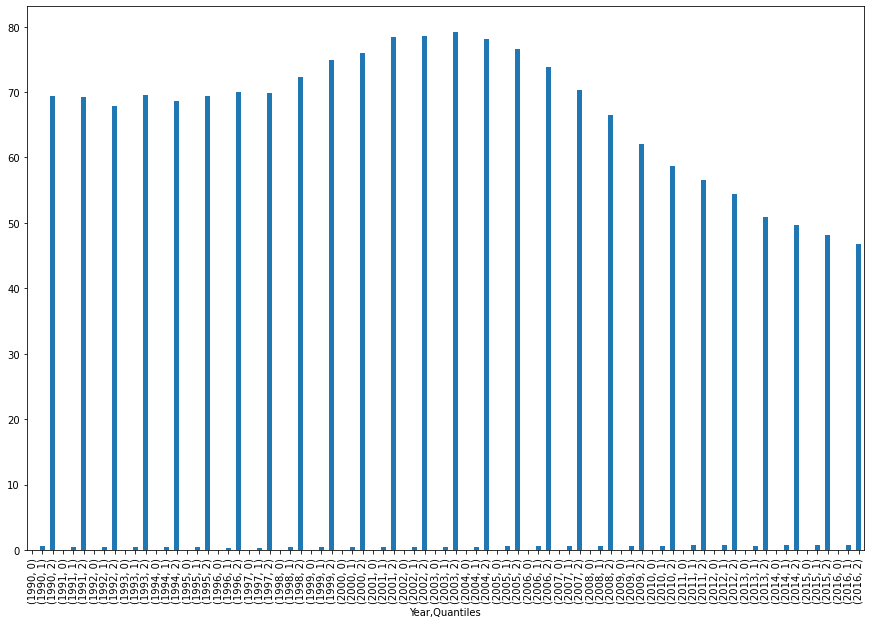

In [14]:
malaria_deaths_geom.groupby(["Year","Quantiles"]).mean()['Deaths - Malaria - Sex: Both - Age: Age-standardized (Rate) (per 100,000 people)'].plot(kind="bar",figsize=(15,10))

In [15]:
malaria_deaths_2003 = malaria_deaths_geom.query("Year == 2003")

In [16]:
malaria_deathmap_2003 = countries.merge(malaria_deaths_2003, left_on="iso_a3",right_on="Code")

In [17]:
malaria_deathmap_2003.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 167 entries, 0 to 166
Data columns (total 14 columns):
 #   Column                                                                            Non-Null Count  Dtype   
---  ------                                                                            --------------  -----   
 0   pop_est                                                                           167 non-null    int64   
 1   continent_x                                                                       167 non-null    object  
 2   name_x                                                                            167 non-null    object  
 3   iso_a3                                                                            167 non-null    object  
 4   gdp_md_est                                                                        167 non-null    float64 
 5   geometry_x                                                                        167 non-null    geometry

<AxesSubplot:>

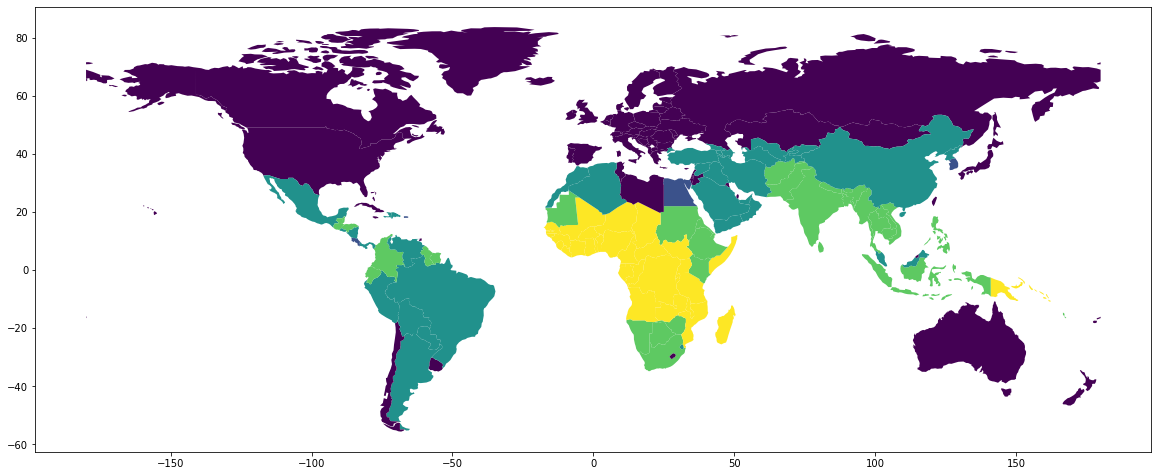

In [18]:
fig, ax = plt.subplots(1,1,figsize = (20,15))
malaria_deaths_2003.plot(
    ax = ax,
    column = 'Deaths - Malaria - Sex: Both - Age: Age-standardized (Rate) (per 100,000 people)',
    scheme = "quantiles"
)

In [ ]:
view(malaria_deaths_2003,
     column = 'Deaths - Malaria - Sex: Both - Age: Age-standardized (Rate) (per 100,000 people)',
    scheme = 'naturalbreaks')

In [20]:
malaria_deaths_byAge = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2018/2018-11-13/malaria_deaths_age.csv',index_col=0)
malaria_deaths_byAge_country = countries.merge(malaria_deaths_byAge,left_on="iso_a3",right_on='code')
malaria_deaths_byAge_country


,pop_est,continent,name,iso_a3,gdp_md_est,geometry,entity,code,year,age_group,deaths
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",Fiji,FJI,1990,Under 5,0.000000
1,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",Fiji,FJI,1991,Under 5,0.000000
2,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",Fiji,FJI,1992,Under 5,0.000000
3,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",Fiji,FJI,1993,Under 5,0.000000
4,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",Fiji,FJI,1994,Under 5,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
22540,13026129,Africa,S. Sudan,SSD,20880.0,"POLYGON ((30.83385 3.50917, 29.95350 4.17370, ...",South Sudan,SSD,2012,50-69,209.635747
22541,13026129,Africa,S. Sudan,SSD,20880.0,"POLYGON ((30.83385 3.50917, 29.95350 4.17370, ...",South Sudan,SSD,2013,50-69,207.122913
22542,13026129,Africa,S. Sudan,SSD,20880.0,"POLYGON ((30.83385 3.50917, 29.95350 4.17370, ...",South Sudan,SSD,2014,50-69,229.286711
22543,13026129,Africa,S. Sudan,SSD,20880.0,"POLYGON ((30.83385 3.50917, 29.95350 4.17370, ...",South Sudan,SSD,2015,50-69,237.788221


In [47]:
import plotly.express as px
data = malaria_deaths_byAge_country.groupby(['year','age_group']).sum().reset_index()
fig = px.line(data,
              x = 'year',
              y = 'deaths',
              color = 'age_group'
             )
for d in range(len(fig.data)):
    fig.data[d].update(mode='markers+lines')
fig.show()

<AxesSubplot:xlabel='year', ylabel='deaths'>

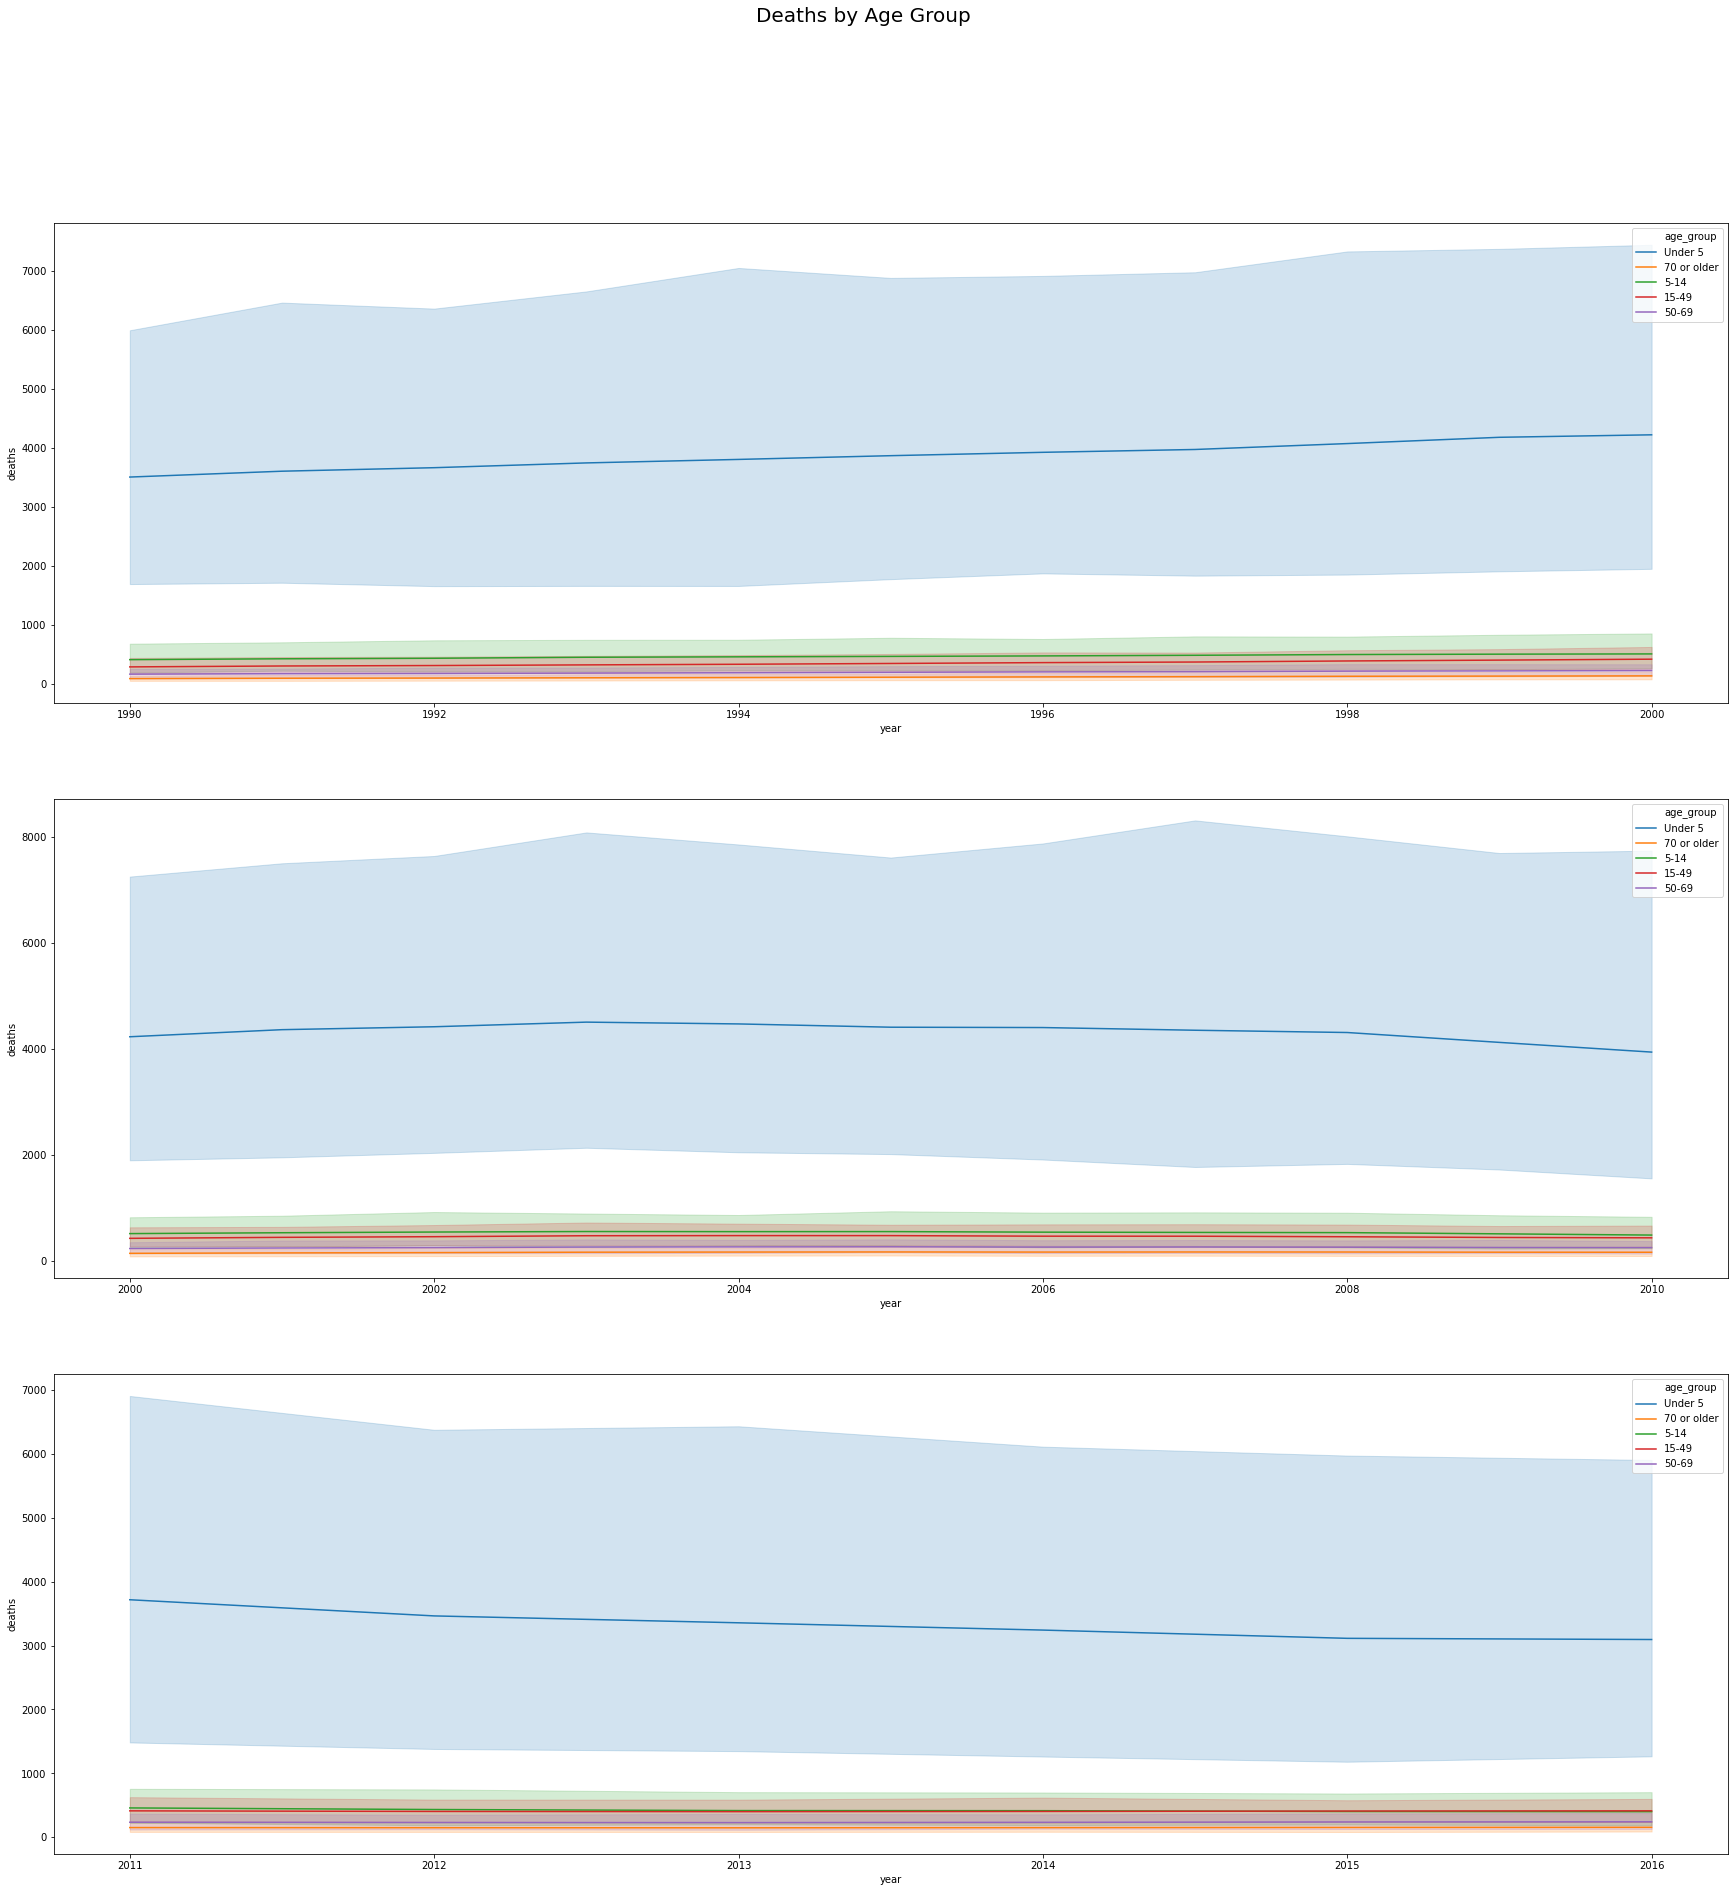

In [21]:
fig, ax = plt.subplots(3,1,figsize=(30,30))
plt.suptitle("Deaths by Age Group",size=20)
sns.lineplot(x= 'year' ,
           y= 'deaths' ,
           hue= 'age_group',
           data = malaria_deaths_byAge_country.query("1990 <= year <= 2000"),
           ax = ax[0])
sns.lineplot(x= 'year' ,
           y= 'deaths' ,
           hue= 'age_group',
           data = malaria_deaths_byAge_country.query("2000 <= year <= 2010"),
           ax = ax[1])
sns.lineplot(x= 'year' ,
           y= 'deaths' ,
           hue= 'age_group',
           data = malaria_deaths_byAge_country.query("year > 2010"),
           ax = ax[2])

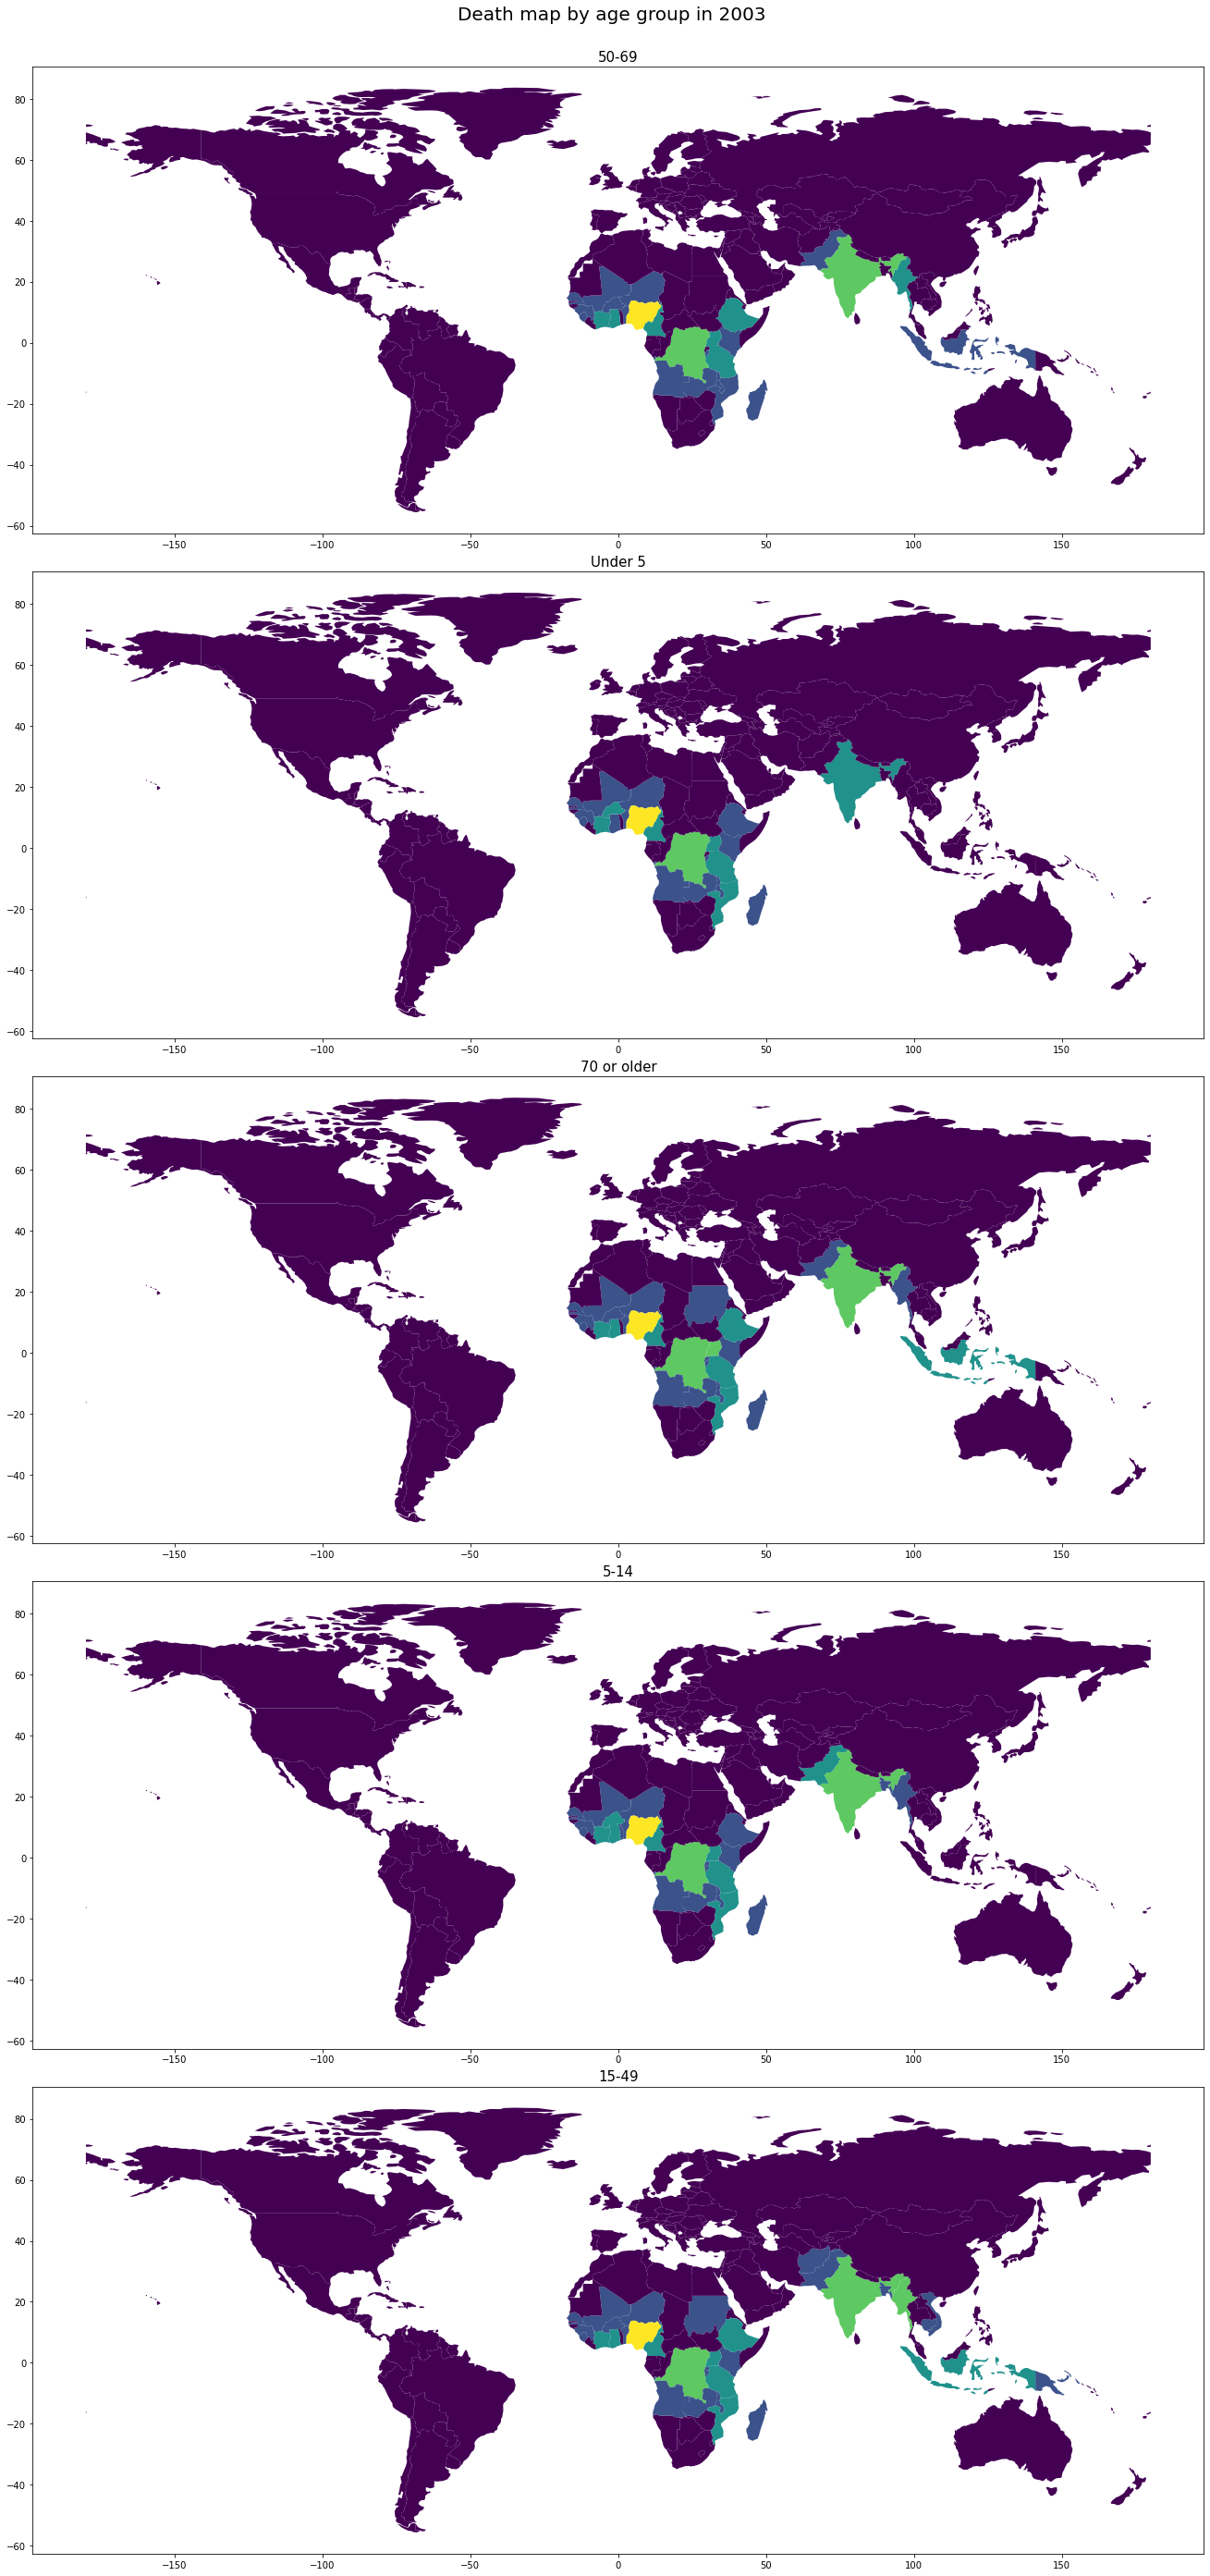

In [28]:
fig, ax = plt.subplots(5,1,figsize=(30,40))
plt.suptitle("Death map by age group in 2003", size=20)
plt.tight_layout(pad=5, h_pad=2)
for i,g in enumerate(set(malaria_deaths_byAge_country.age_group)):
    ax[i].set_title(f"{g}",size=15)
    malaria_deaths_byAge_country.query(f'(age_group == "{g}")  & (year == 2003)').plot(column="deaths",
                                                                                       ax=ax[i],
                                                                                       scheme='naturalbreaks')

In [29]:
data = malaria_deaths_byAge_country.query("(age_group == 'Under 5') & (year == 2003)")
view(data,
     "deaths",
     scheme='naturalbreaks')

In [32]:
for i,g in enumerate(set(malaria_deaths_byAge_country.age_group)):
    ax[i].set_title(f"{g}",size=15)
    data = malaria_deaths_byAge_country.query(f"(age_group == '{g}') & (year == 2003)")
    v = view(data,
         "deaths",
         scheme='naturalbreaks')
    